In [27]:
import math
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [28]:
#edit the input file name
input_data_file = 'Restaurant_Domain_Dataset.xlsx'
dataframe = pd.DataFrame(pd.read_excel(input_data_file, index_col = 0))
dataframe

,Alternate_Available,Bar,Friday,Hungry,Patrons,Price,Rain,Reservation,Type,Estimated_Wait_Time,WillWait
Sample,,,,,,,,,,,
x1,Yes,No,No,Yes,Some,$$$,No,Yes,French,0-10,Yes
x2,Yes,No,No,Yes,Full,$,No,No,Thai,30-60,No
x3,No,Yes,No,No,Some,$,No,No,Burger,0-10,Yes
x4,Yes,No,Yes,Yes,Full,$,Yes,No,Thai,10-30,Yes
x5,Yes,No,Yes,No,Full,$$$,No,Yes,French,>60,No
x6,No,Yes,No,Yes,Some,$$,Yes,Yes,Italian,0-10,Yes
x7,No,Yes,No,No,None,$,Yes,No,Burger,0-10,No
x8,No,No,No,Yes,Some,$$,Yes,Yes,Thai,0-10,Yes
x9,No,Yes,Yes,No,Full,$,Yes,No,Burger,>60,No


In [29]:
def calculate_output_entropy(dataframe, target_variable):
    # Count the occurrences of each class label
    class_counts = dataframe[target_variable].value_counts()
    total_instances = len(dataframe)
    
    # Calculate the entropy
    entropy = 0.0
    
    for count in class_counts:
        probability = count / total_instances
        entropy -= probability * math.log2(probability)
    
    return entropy

out_entropy = calculate_output_entropy(dataframe, 'WillWait')
print("Entropy:", out_entropy)

Entropy: 1.0


In [30]:
def entropy(probability):
    result = 0
    if probability == 1:
        result = (probability * math.log2(probability))*(-1)
    elif probability == 0:
        result = ((1-probability) * math.log2(1-probability))*(-1)
    else:
        result = ((probability * math.log2(probability)) + ((1-probability) * math.log2(1-probability)))*(-1)
    return result 

In [43]:
def max_gain(dataframe):
    
    out_entropy = calculate_entropy(dataframe, 'WillWait')
   
    total_instances = len(dataframe)
    
    gain = []
    remainder = 0
    
    for index in range(dataframe.shape[1]):
        
        column = dataframe.iloc[:, index]
        uniques= dataframe[column.name].unique()
        
        
        for u in uniques:
            #print("\n",column.name)
            cond_ = dataframe[column.name].isin([u])
            unique_df = dataframe.loc[cond_,:]
            bag = len(unique_df)
            
            cond_ = dataframe["WillWait"].isin(["Yes"])
            uniqueWillWait = unique_df.loc[cond_,:]
            
            #print ("\nbag is :", bag)
            #print ("\nuniquewillwait now is :", uniqueWillWait)
            
            #print ("division is: ", len(uniqueWillWait))
            #print ("/", bag)
            
            
            #print("Entropy is: ", entropy((len(uniqueWillWait))/bag))
            thisEntropy = entropy((len(uniqueWillWait))/bag)
            #print("(", bag, "/", total_instances, ")*",thisEntropy)
            remainder += (bag/total_instances) * thisEntropy
            #print(remainder)
        
        
    
        gain.append(calculate_entropy(dataframe, 'WillWait') - remainder)
        remainder = 0

        
    gain.pop() #deletes the gain calculated for the output variable
    return(gain)

                    
max_gain(dataframe)  

[0.0,
 0.0,
 0.020720839623907805,
 0.19570962879973086,
 0.5408520829727552,
 0.19570962879973075,
 0.020720839623907805,
 0.020720839623907805,
 1.1102230246251565e-16,
 0.20751874963942196]

[Text(0.6, 0.875, 'X[4] <= 1.5\nentropy = 0.991\nsamples = 9\nvalue = [4, 5]'),
 Text(0.4, 0.625, 'X[6] <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(0.2, 0.375, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.6, 0.375, 'X[0] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.4, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.625, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]')]

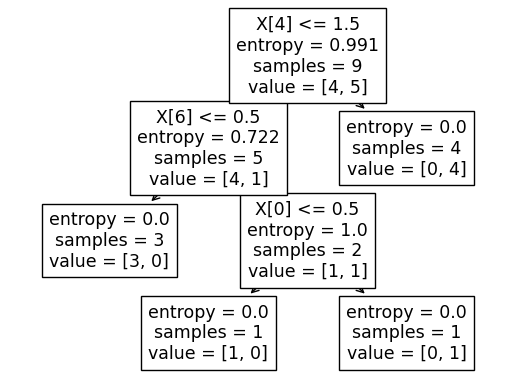

In [32]:
X = dataframe.drop("WillWait", axis=1)
y = dataframe["WillWait"]

label_encoder_X = preprocessing.LabelEncoder()
label_encoder_y = preprocessing.LabelEncoder()

# Apply label encoding to each column in X
for column in X.columns:
    X[column] = label_encoder_X.fit_transform(X[column])

# Apply label encoding to y
y = label_encoder_y.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# create and print the decision tree
dtc = tree.DecisionTreeClassifier(criterion="entropy")
dtc.fit(X_train, y_train)
tree.plot_tree(dtc)

#y_pred = dtc.predict(X_test)
#print(classification_report(y_test, y_pred))


In [33]:


def constructADecisionTree(dataframe):
    
    


SyntaxError: incomplete input (2024480253.py, line 3)

In [ ]:
# Prepare the prediction data
prediction_data = ["Yes", "No", "Yes", "Yes", "Full", "$$", "No", "No", "Italian", ">60"]  # List of input data to predict
dataset_prediction = np.array([["Yes", "No", "Yes", "Yes", "Full", "$$", "No", "No", "Italian", ">60"]])
p = pd.DataFrame(dataset_prediction)

# Encode the prediction data using the original label encoder
encoded_prediction_data = label_encoder_X.fit_transform(prediction_data)
encoded_prediction_data

In [ ]:
#user interfence 
print('we need 12 criteria from you to determine whether or not you will wait')
alternative=input("please indicate whether or not you have an alternative resturant nearby(yes or no)").lower()
yesOrNo=['yes','no']
while(alternative not in yesOrNo ):
    print("the answer must be yes or no")
    alternative=input("please indicate whether or not you have an alternative resturant nearby(yes or no)").lower()

bar=input("please indicate whether or not the resturant has a bar(yes or no)").lower()
while(bar not in yesOrNo ):
    print("the answer must be yes or no")
    bar = input("please indicate whether or not the resturant has a bar(yes or no)").lower()


Weekend=input("please indicate whether or not its weekend(yes or no)").lower()
while(Weekend not in yesOrNo ):
    print("the answer must be yes or no")
    Weekend = input("please indicate whether or not its weekend(yes or no)").lower()

Hungry=input("please indicate whether or not your hungry(yes or no)").lower()
while(Hungry not in yesOrNo ):
    print("the answer must be yes or no")
    Hungry = input("please indicate whether or your hungry(yes or no)").lower()

Patron=input("how many people are in the resturant( None, Some, and Full)").lower()
patronAllowed=['none','some','full']
while(Patron not in patronAllowed):
    print("the answer must be none or some or full")
    Patron = input("how many people are in the resturant( None, Some, and Full)").lower()
price=input("please indicate the price of the resturant($,$$,$$$)").lower()
priceAllowed=['$','$$','$$$']
while(price not in priceAllowed):
    print("the price must be $,$$,$$$")
    price = input("please indicate the price of the resturant($,$$,$$$)").lower()

rain=input("please indicate if its raining outside(yes or no)").lower()
while(rain not in yesOrNo ):
    print("the answer must be yes or no")
    rain=input("please indicate if its raining outside").lower()

Reservation=input("please indicate whether or not (yes or no)")
while(Reservation not in yesOrNo ):
    print("the answer must be yes or no")
    Reservation = input("please indicate whether or not (yes or no)")

typeOfRes=input("please indicate the type of the resturant(french or thai or italian or burger").lower()
TypeOftheRes=['french','thai','burger','italian',]
while(typeOfRes not in TypeOftheRes):
    print("the types are italian and burger and thai and french")
    typeOfRes = input("please indicate the type of the resturant(french or thai or italian or burger").lower()

Waitestimate=input("please indicate the wait estimate given by the host (miuetes by number)").lower()

while(Waitestimate.isdigit() is not True):
    print("please enter a number")
    Waitestimate = input("please indicate the wait estimate given by the host (miuetes by number)").lower()

WaitestimateNumber =int(Waitestimate)

while(WaitestimateNumber<0):
    print("the number must be greater than 0")
    Waitestimate = input("please indicate the wait estimate given by the host (miuetes by number)").lower()

if(WaitestimateNumber<10):
    Waitestimate='0-10'
elif (WaitestimateNumber<30):
    Waitestimate = '10-30'
elif (WaitestimateNumber < 60):
    Waitestimate = '30-60'
elif (WaitestimateNumber > 60):
    Waitestimate = '>60'

print("your wait estimate category is ", Waitestimate)

VectorOfInputs=[alternative,bar,Weekend,Hungry,Patron,price,rain,Reservation,TypeOftheRes,Waitestimate]
willWait=ConstructTree(VectorOfInputs)
print("will you wait?",willWait)
